<h3> <center> Analiza przeżycia </center>

Niech $T$ będzie zmienną losową opisującą czas, który minął do pewnego zdarzenia.

Definiujemy $S(t) = P(T>t)$ - funkcja przeżycia (określa prawdopodobieństwo wystąpienia zdarzenia po czasie $t$)

In [1]:
dane = read.table("http://www.biecek.pl/R/dane/dane0.csv", sep = ";", header = T)
head(dane)

,Wiek,Rozmiar.guza,Wezly.chlonne,Nowotwor,Receptory.estrogenowe,Receptory.progesteronowe,Niepowodzenia,Okres.bez.wznowy,VEGF
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,29,1,0,2,(-),(++),brak,22,914
2,29,1,0,2,(++),(++),brak,53,1118
3,30,1,1,2,(-),(+),brak,38,630
4,32,1,0,3,(++),(++),brak,26,1793
5,32,2,0,NA,(-),(++),brak,19,963
6,33,1,1,3,(-),(++),wznowa,36,2776


In [23]:
dane = read.table("http://www.biecek.pl/R/dane/dane0.csv", sep = ";", header = T)
head(dane)

,Wiek,Rozmiar.guza,Wezly.chlonne,Nowotwor,Receptory.estrogenowe,Receptory.progesteronowe,Niepowodzenia,Okres.bez.wznowy,VEGF
,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,29,1,0,2,(-),(++),brak,22,914
2,29,1,0,2,(++),(++),brak,53,1118
3,30,1,1,2,(-),(+),brak,38,630
4,32,1,0,3,(++),(++),brak,26,1793
5,32,2,0,NA,(-),(++),brak,19,963
6,33,1,1,3,(-),(++),wznowa,36,2776


In [24]:
x = dane$Okres.bez.wznowy
print(x)

 [1] 22 53 38 26 19 36 33 38 38 37 47 40 30 16 44 27 36 19 41 18 41 29 47 47 53
[26] 33 30 39 38 47 44 48 33 36 43 53 38 33 41 54 51 23 42 42 45 51 42 36 38 28
[51] 27 31 47 33 42 38 34 21 34 36 26 36 39 39 49 28 19 29 46 33 45 39 43 49 41
[76] 27 33 33 36 50 52 10 49 30 30 42 47 48 35 48 43 50 30 36 29 NA 46


In [25]:
summary(dane)

      Wiek        Rozmiar.guza   Wezly.chlonne       Nowotwor    
 Min.   :29.00   Min.   :1.000   Min.   :0.0000   Min.   :1.000  
 1st Qu.:42.00   1st Qu.:1.000   1st Qu.:0.0000   1st Qu.:2.000  
 Median :46.00   Median :1.000   Median :0.0000   Median :2.000  
 Mean   :45.52   Mean   :1.268   Mean   :0.4124   Mean   :2.221  
 3rd Qu.:50.00   3rd Qu.:2.000   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :57.00   Max.   :2.000   Max.   :1.0000   Max.   :3.000  
                                                  NA's   :11     
 Receptory.estrogenowe Receptory.progesteronowe Niepowodzenia     
 Length:97             Length:97                Length:97         
 Class :character      Class :character         Class :character  
 Mode  :character      Mode  :character         Mode  :character  
                                                                  
                                                                  
                                                                  
   

In [26]:
table(dane[c(4,7)])

        Niepowodzenia
Nowotwor brak wznowa
       1    7      0
       2   49      4
       3   17      9

In [27]:
print(summary(factor(dane$Nowotwor)))

   1    2    3 NA's 
   7   53   26   11 


In [28]:
library(survival) #tam jest metoda Surv
czasy = with(dane, Surv(Okres.bez.wznowy, Niepowodzenia == "wznowa"))
czasy #część obserwacji  to tzw. obserwacje ocenzurowane

 [1] 22+ 53+ 38+ 26+ 19+ 36  33+ 38+ 38  37+ 47+ 40  30  16  44+ 27+ 36+ 19+ 41+
[20] 18+ 41  29  47+ 47+ 53+ 33+ 30+ 39+ 38+ 47+ 44+ 48+ 33+ 36+ 43  53+ 38+ 33+
[39] 41+ 54+ 51+ 23+ 42+ 42+ 45+ 51+ 42+ 36+ 38+ 28+ 27+ 31+ 47+ 33+ 42+ 38+ 34+
[58] 21  34+ 36+ 26+ 36+ 39+ 39+ 49+ 28+ 19  29+ 46+ 33+ 45+ 39+ 43+ 49+ 41+ 27+
[77] 33+ 33+ 36+ 50+ 52+ 10  49+ 30+ 30+ 42+ 47+ 48  35+ 48+ 43+ 50  30+ 36+ 29+
[96] NA+ 46+

Estymator Kaplana-Meiera (uwzględnia obserwacje cenzurowane)

$\bar{S(t)}=\prod_{t_i  \leq t} \frac{n_i-d_i}{n_i}$

- $n_i$ liczba osób, które dotrwały (dożyły) do danego momentu
- $d_i$ liczba zdarzeń (śmierci) w danym momencie

In [29]:
model1 = survfit(Surv(Okres.bez.wznowy, Niepowodzenia == "wznowa")~1, data = dane) #estymator Kaplana-Meiera (oparty o metodę największej wiarygodnosci)
summary(model1)

Call: survfit(formula = Surv(Okres.bez.wznowy, Niepowodzenia == "wznowa") ~ 
    1, data = dane)

1 observation deleted due to missingness 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   10     96       1    0.990  0.0104        0.969        1.000
   16     95       1    0.979  0.0146        0.951        1.000
   19     93       1    0.969  0.0178        0.934        1.000
   21     90       1    0.958  0.0206        0.918        0.999
   29     80       1    0.946  0.0236        0.901        0.993
   30     77       1    0.934  0.0263        0.884        0.987
   36     60       1    0.918  0.0301        0.861        0.979
   38     51       1    0.900  0.0345        0.835        0.970
   40     40       1    0.878  0.0403        0.802        0.960
   41     39       1    0.855  0.0451        0.771        0.948
   43     30       1    0.827  0.0518        0.731        0.935
   48     15       1    0.771  0.0719        0.643        0.926
   50      9       1    0.68

In [30]:
#przykladowo dla ostatnieniego wiersza
nrisk = c(96,95,93,90,80,77,60,51,40,39,30,15,9)
prod((nrisk - 1)/nrisk)

[1] 0.6857316

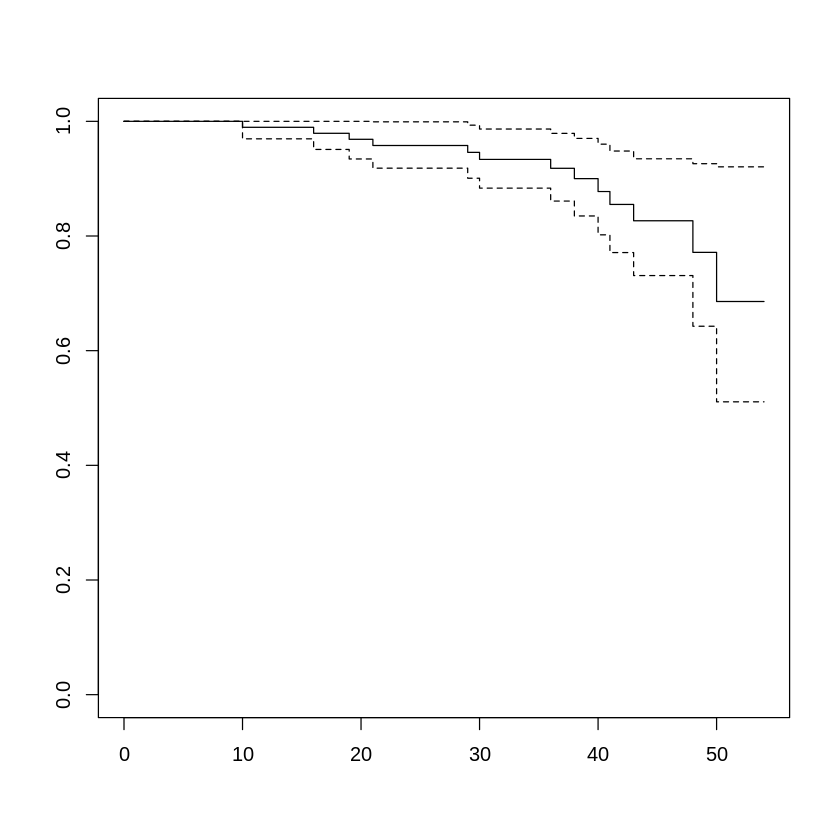

In [31]:
plot(model1)

Warning message in .pvalue(fit, data = data, method = method, pval = pval, pval.coord = pval.coord, :
“There are no survival curves to be compared. 
 This is a null model.”


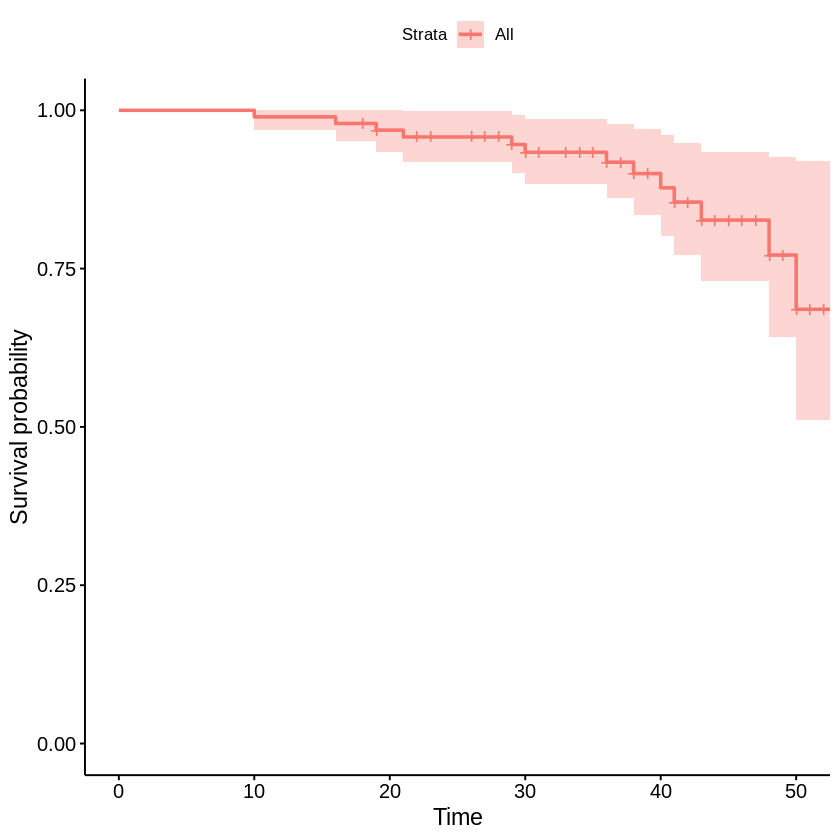

In [36]:
library(survminer)
ggsurvplot(model1, data = dane, pval = TRUE)

<h4> Pytanie: Jakie w tej populacji jest prawdopodobieństwo, że wznowa nastąpiła do 48 okresów?

<h4> Pytanie: Zauważ, że $\bar{S}$ jest funkcją nieujemną, nierosnącą i przyjmującą wartości z zakresu [0,1]. Kiedy $\bar{S(t)} = 0$ ?

In [37]:
model2 = survfit(Surv(Okres.bez.wznowy, Niepowodzenia == "wznowa")~Nowotwor, data = dane)
summary(model2)

Call: survfit(formula = Surv(Okres.bez.wznowy, Niepowodzenia == "wznowa") ~ 
    Nowotwor, data = dane)

11 observations deleted due to missingness 
                Nowotwor=1 
     time n.risk n.event survival std.err lower 95% CI upper 95% CI

                Nowotwor=2 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   19     53       1    0.981  0.0187        0.945            1
   29     46       1    0.960  0.0279        0.907            1
   30     43       1    0.937  0.0351        0.871            1
   48      9       1    0.833  0.1030        0.654            1

                Nowotwor=3 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   10     26       1    0.962  0.0377       0.8904        1.000
   16     25       1    0.923  0.0523       0.8261        1.000
   21     23       1    0.883  0.0636       0.7668        1.000
   36     18       1    0.834  0.0767       0.6964        0.999
   38     15       1    0.778  0.0895       0.6213       

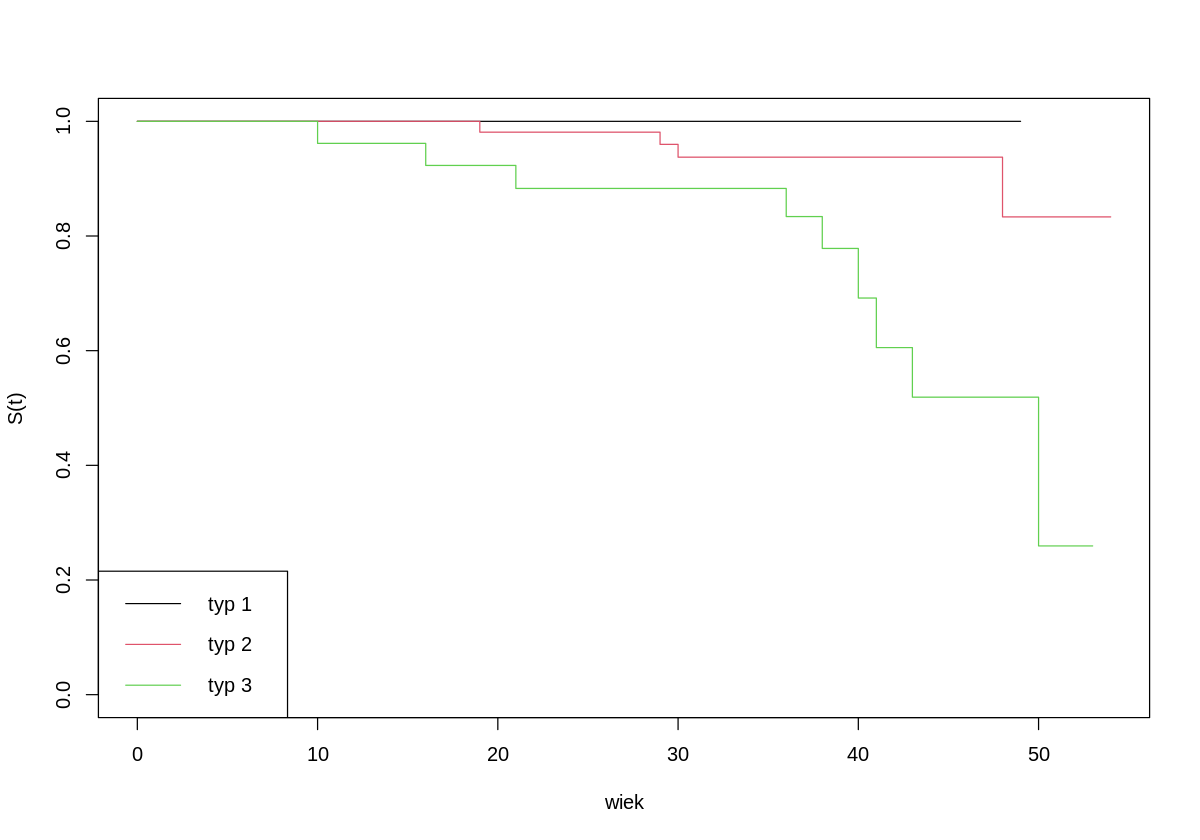

In [38]:
options(repr.plot.width=10, repr.plot.height=7)
plot(model2, col=1:3, xlab="wiek", ylab="S(t)")
legend("bottomleft", legend=c("typ 1","typ 2","typ 3"), col=1:3, lty=1, y.intersp=1.7)

In [39]:
survdiff(Surv(Okres.bez.wznowy, Niepowodzenia == "wznowa")~Nowotwor, data = dane) #test, wskazuje czy krzywa przezycia rozni sie istotnie dla roznych stopni zaawansowania nowotworu

Call:
survdiff(formula = Surv(Okres.bez.wznowy, Niepowodzenia == "wznowa") ~ 
    Nowotwor, data = dane)

n=86, 11 observations deleted due to missingness.

            N Observed Expected (O-E)^2/E (O-E)^2/V
Nowotwor=1  7        0    0.913     0.913     0.991
Nowotwor=2 53        4    8.532     2.408     7.091
Nowotwor=3 26        9    3.554     8.344    11.552

 Chisq= 11.7  on 2 degrees of freedom, p= 0.003 

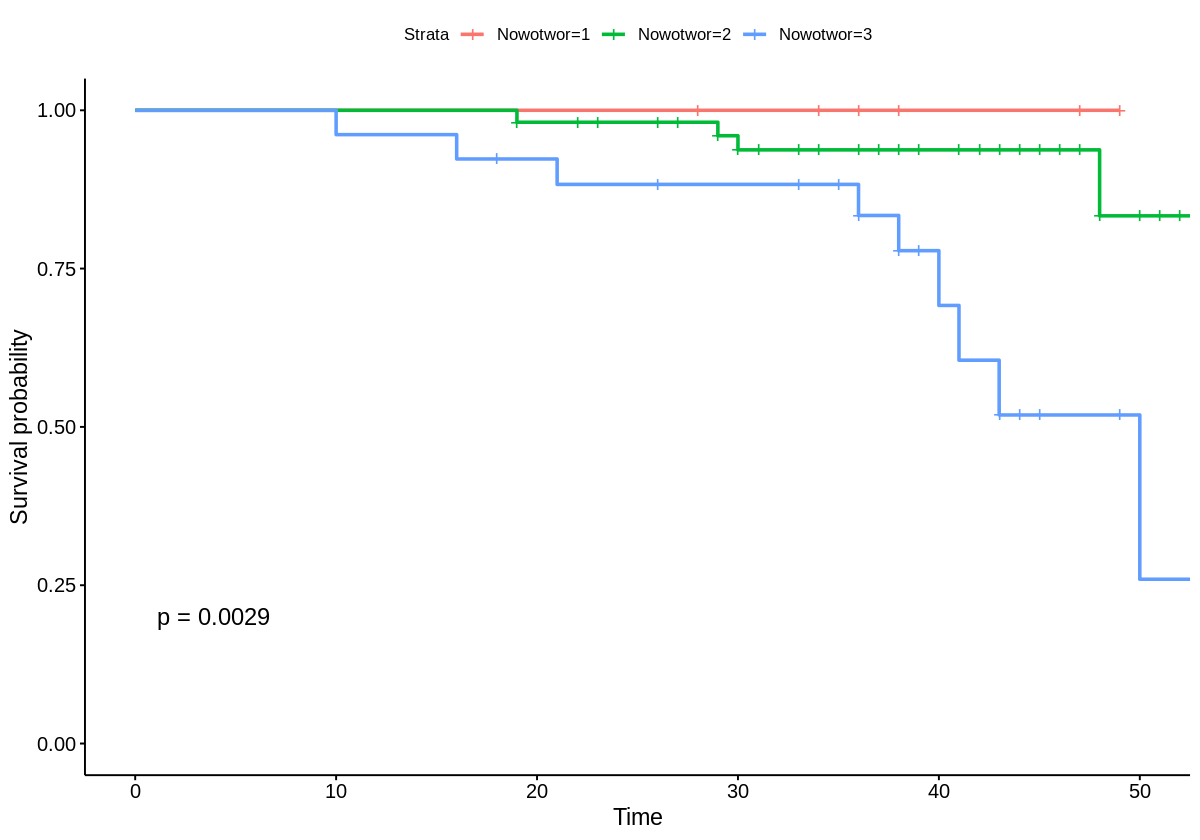

In [40]:
ggsurvplot(model2, data = dane, pval = TRUE)

<h3> <center> Funkcja hazardu </center>

<h4> $h(t) = P(T=t|T \geq t)$

* Uwaga: Zachodzi następująca relacja pomiędzy funkcją hazardu a funkcją przeżycia $h(t) = -\frac{d}{dt}\ln S(t)$

Ciekawostka:
W Europie Zachodniej $S(100) > S(110)$ (oczywiste), ale $h(100) \approx h(110)$. Czyli z jednej strony oczywiście prawdopodobieństwo przeżycia 100 lat jest większe niż 110 lat, ale już ryzyko śmierci dla osób w wieku 100 i 110 jest porównywalne.

<h4> Zadanie1: Mając daną funkcję przeżycia wyznacz funkcję hazardu:
    
<br>

a) $S(t) = e^{-0.2t}$

b) $S(t) = e^{-0.05t^2}$

Zastanów się nad interpretacją obydwu funkcji.

<h3> <center> Model Coxa (Model hazardu proporcjonalnego) </center>


$h(t|X) = h_0(t)e^{X\beta} $

Zauważ, że z postaci modelu wynika, że $\frac{h(t|X_1)}{h(t|X_2)} = \frac{h_0(t)e^{X_1\beta}}{h_0(t)e^{X_2\beta}}=e^{(X_1-X_2)\beta}$ (czyli nie zależy od czasu!)

Załóżmy, że $X = (x_1,x_2,...,x_n)$ (wektor $X$ składa się z $n$ cech). Niech cecha $x_1$ wzrośnie o 1. Jak wtedy zmieni się funkcja hazardu?

$\frac{h(t|(x_1+1,x_2,...,x_n))}{h(t|(x_1,x_2,...,x_n))} = e^{(x_1+1)\beta_1+x_2 \beta_2 +... - x_1 \beta_1 - x_2 \beta_2 ...} = e^{\beta_1}$

Analogicznie dla pozostałych zmiennych. Wartość tę nazywamy hazardem względnym (HR = hazard ratio).


* Przykład

In [41]:
model = coxph(Surv(Okres.bez.wznowy, o)~Nowotwor+Wiek, data = dane) #concordance opisuje jakosc modelu, 1 - idealnie, 0.6-0.7 ok, 0.5 - losowy; bazowy hazard basehaz(model)
summary(model)

Call:
coxph(formula = Surv(Okres.bez.wznowy, Niepowodzenia == "wznowa") ~ 
    Nowotwor + Wiek, data = dane)

  n= 86, number of events= 13 
   (11 observations deleted due to missingness)

             coef exp(coef) se(coef)      z Pr(>|z|)   
Nowotwor  1.75372   5.77607  0.59566  2.944  0.00324 **
Wiek     -0.05632   0.94524  0.04340 -1.297  0.19447   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

         exp(coef) exp(-coef) lower .95 upper .95
Nowotwor    5.7761     0.1731    1.7973    18.563
Wiek        0.9452     1.0579    0.8682     1.029

Concordance= 0.747  (se = 0.073 )
Likelihood ratio test= 12.17  on 2 df,   p=0.002
Wald test            = 10  on 2 df,   p=0.007
Score (logrank) test = 11.62  on 2 df,   p=0.003


<h4> Pytanie: Odczytaj hazardy względne dla zmiennych Nowotwor oraz Wiek. Zinterpretuj ich wartości.

<h4> Pytanie: Zauważ, że w powyższym modelu nie jest estymowany wyraz wolny. Dlaczego możemy z niego zrezygnować?

In [44]:
print(anova(model))

Analysis of Deviance Table
 Cox model: response is Surv(Okres.bez.wznowy, Niepowodzenia == "wznowa")
Terms added sequentially (first to last)

          loglik   Chisq Df Pr(>|Chi|)   
NULL     -49.414                         
Nowotwor -44.129 10.5700  1   0.001149 **
Wiek     -43.331  1.5956  1   0.206534   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


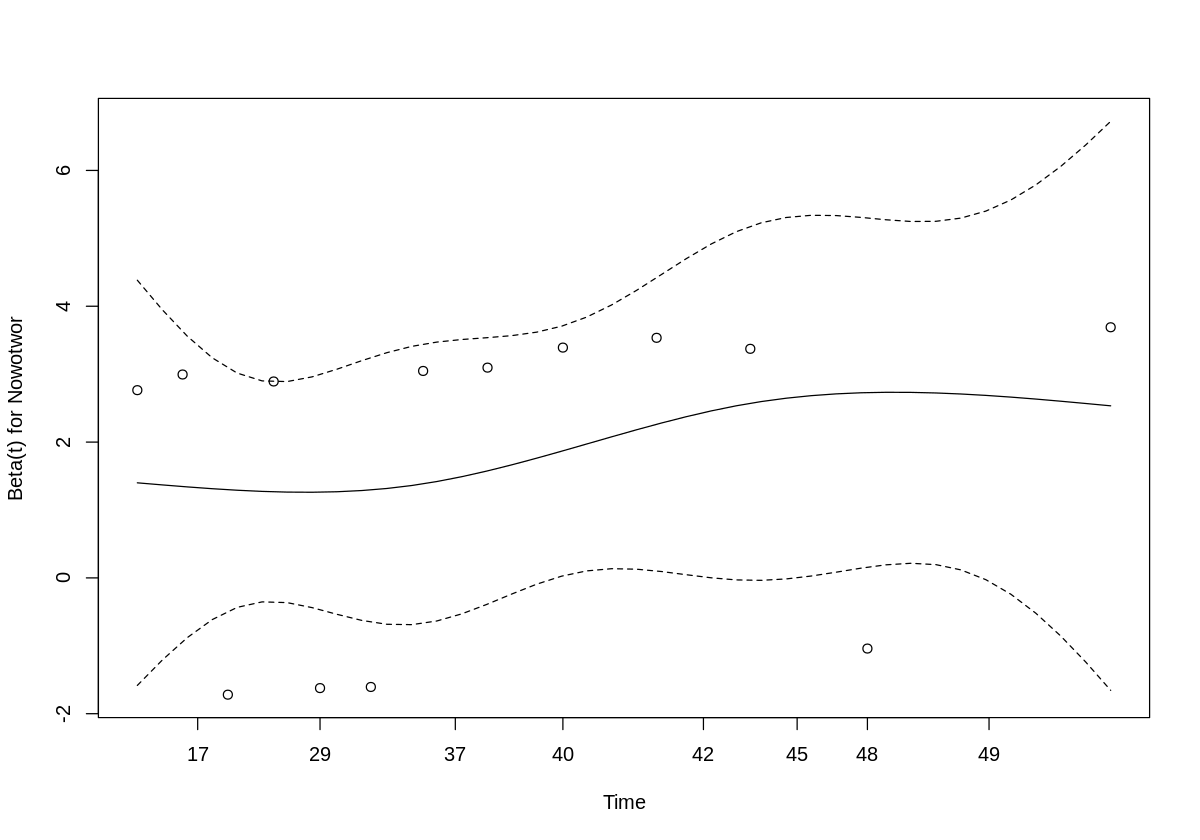

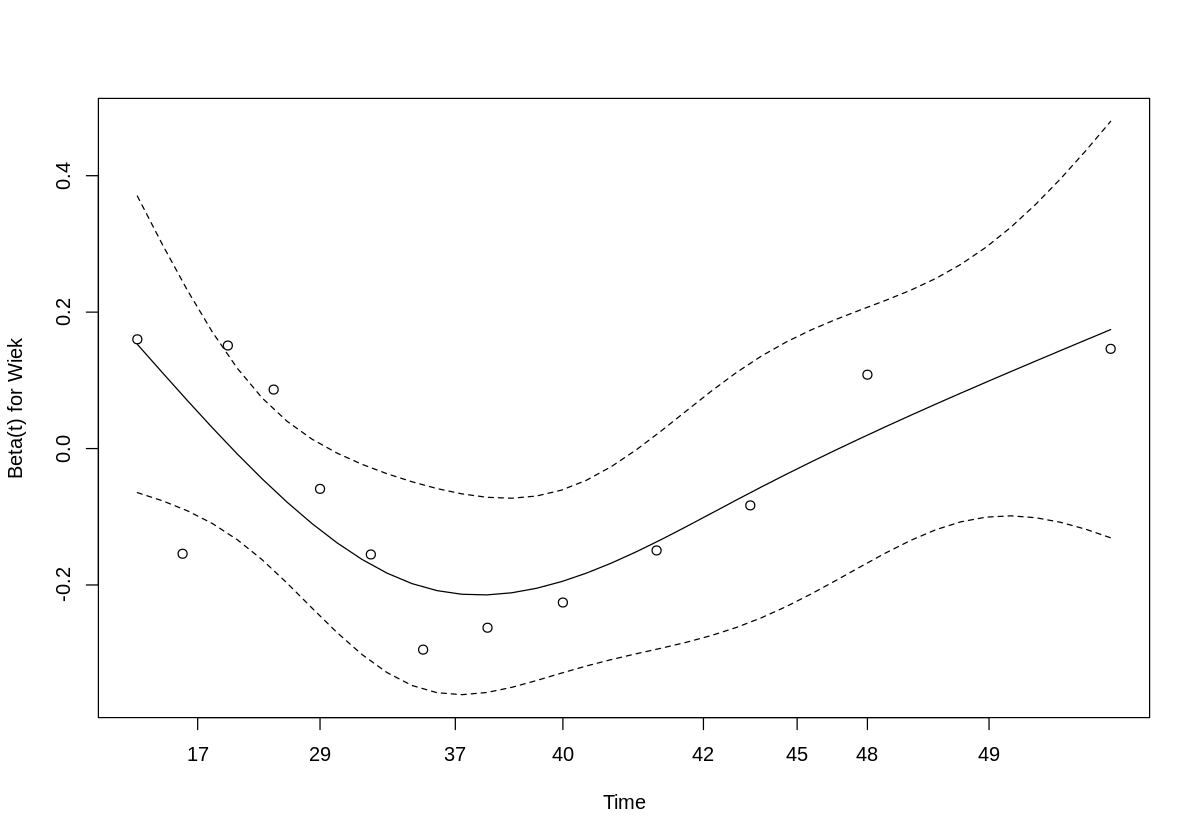

In [45]:
plot(cox.zph(model)) #wizualna ocena założeń: nachylenie powinno byc bliskie zera (staly poziom w czasie)

<h4> Zadanie2: Przebadano 100 pacjentów w 65. roku życia, u których nie wystąpiła jeszcze choroba Alzheimera.

- W kolumnie cukrzyca znajduje się informacja czy dana osoba choruje na nią (1) bądź nie (0).
- W kolumnie mmse przedstawiono wynik testu do oceny funkcji poznawczych.
- Pierwsza kolumna (czas) opisuje długość trwania monitorowania wybranego pacjenta (w latach).
- Kolumna status opisuje z kolei czy do danego okresu pojawiły się objawy choroby Alzheimera (1 lub 0).

Celem jest zbudowanie modelu, który na podstawie informacji o obecności (bądź braku) cukrzycy i wyniku testu MMSE odpowie na pytanie w jakim stopniu te czynniki mogą mieć udział w pojawieniu się w następnej kolejności choroby Alzheimera. Zinterpretuj wyestymowane współczynniki. Zwróć uwagę na istotność statystyczną czynnika cukrzycy. Z czego może wynikać otrzymana wartość? Czy uzykany efekt może być istotny klinicznie?

<h4> Zadanie3: Zbudowano model Coxa opisujący czas życia wirusa w zależności od powierzchni na której przebywa. Rozważano 3 typy powierzchni: plastik (A), karton (B) oraz miedź (C). Zbudowano model $h(t| pow) = h_0(t) \cdot e^{\beta_1 powB + \beta_2 powC}$. Wiadomo, że w porównaniu do powierzchni plastikowej, na powierzchni kartonowej wirus żyje średnio 3 razy krócej, na miedzianej 20 razy krócej. Wyznacz współczynniki $\beta_1$ oraz $\beta_2$.

* Warto zajrzeć: https://zenodo.org/records/15122700 (informacje o przeżyciu, ekspresji genów i fenotypie pacjentów)

<h4> Zagadnienia na test praktyczny: 
</h4>


- Podstawowe miary statystyczne - średnia, mediana, kwantyl, dominantna, odchylenie, kurtoza, skośność.
- Pojęcie zmiennej losowej i jej charakterystyk - wartości oczekiwanej, wariancji, odchylenia, kurtozy, skośności.
- Pojęcia gęstości prawdopodobieństwa i dystrybuanty oraz ich interpretacja.
- Znajomość podstawowych rozkładów (w szczególności: jednostajny, normalny, wykładniczy, Poissona, dwupunktowy, geometryczny).
- Metody estymacji parametrów rozkładu (metoda momentów, metoda największej wiarygodności).
- Prawa wielkich liczb, centralne twierdzenie graniczne.
- Znajomość schematu testów statystycznych (H0, H1), p_value - co oznacza, jak liczymy i jak interpretować. Co znaczy, że dany współczynnik jest istotny statystycznie. Interpretacja zbudowanego modelu - statystyczna (opisowa) oraz przyczynowa (kauzalna)
- Wybrane testy statystyczne (w szczególności: shapiro, t-test, prop.test, chisq, ANOVA).
- Regresja liniowa jednej i wielu zmiennych (w tym budowa modelu, diagnostyka, ocena jakości, predykcja, wyznaczanie wartości odstających/wpływowych). Model addytywny vs model z interakcją.
- Porównywanie modeli (F test (polecenie anova), AIC).
- Nieliniowe transformacje danych (potęgowe, logarytmiczne; w szczególności Box-Cox).
- Zmienne numeryczne a kategoryczne (specyfika budowy modeli w obu przypadkach).
- Uogólnione modele liniowe (regresja logistyczna i poissonowska)
- Znajomość pojęć: dokładność, czułość, specyficzność.
- Analiza przeżycia. Czym jest funkcja przeżycia i funkcja hazardu? Jaka zachodzi między nimi relacja. Estymator Kaplana-Meiera. Model Coxa.

Zagadnienia uzupełniające (tego nie będzie bezpośrednio na teście)
- testy nieparametryczne (Wilcoxona, Kruskala-Wallisa)
- krzywa ROC
- regresja z rozkładem ujemnym dwumianowym

Język R jest dla nas narzędziem do realizacji analizy statystycznej. Test nie będzie zatem bezpośrendnio koncentrował się na składni R, jednak należy znać podstawowe funkcje jak np. pnorm, qnorm, rnorm, dnorm, t.test, shapiro.test, anova, lm, glm, survfit, coxph itd. jak i interpretować ich wyniki.